# K-means Clustering

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
def findClosestCentroids(X, centroids):
    # Set K size (number of centroids)
    K = centroids.shape[0]

    # Initialise result array
    result = np.zeros((X.shape[0], 1), dtype = np.int)
    
    for i in range(X.shape[0]):
        dist = np.linalg.norm(X[i] - centroids, axis = 1)
        min_dist = np.argmin(dist)
        result[i] = min_dist
    
    return result

In [3]:
data = loadmat('ex7data2.mat')
X = data["X"]

K = 3 
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples: \n')
print(idx[:K])
print('\n(The closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples: 

[[0]
 [2]
 [1]]

(The closest centroids should be 0, 2, 1 respectively)


In [24]:
def computeCentroids(X, idx, K):

    m, n = X.shape
    
    # Initialize centroids matrix
    centroids = np.zeros((K, n))

    for k in range(K):        
         # Taking each point of training examples     
        for i in range(m):
            if idx[i] == k:
                points = X[i]
                centroids[k] = np.mean(points, axis = 0)  
    
#    for k in range(K):
#        centroids[k, :] = np.mean(X[idx.ravel() == k, :], axis = 0)
    return centroids


In [25]:
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)
print('\nThe centroids should be:\n')
print('[ 2.42830111  3.15792418 ]')
print('[ 5.81350331  2.63365645 ]')
print('[ 7.11938687  3.6166844 ]')

Centroids computed after initial finding of closest centroids: 

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be:

[ 2.42830111  3.15792418 ]
[ 5.81350331  2.63365645 ]
[ 7.11938687  3.6166844 ]


In [44]:
import os
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

for i in range(max_iters):
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, K)

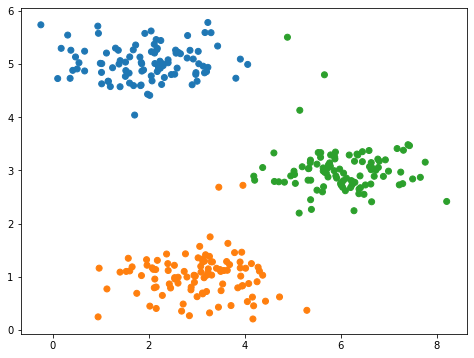

In [37]:
plt.figure(figsize = (8, 6))
colors = [plt.cm.tab20(float(i) / 10) for i in idx]
plt.scatter(X[:, 0], X[:, 1], c = colors)